<a href="https://colab.research.google.com/github/cleamm/FinalProject/blob/master/movie1pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 41.7 MB/s eta 0:00:00


In [ ]:
!pip install pandas openpyxl xlrd konlpy scikit-learn

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,575 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121920 files and dire

Epoch 1/30
83/83 [==============================] - 47s 316ms/step - loss: 8.1136 - accuracy: 0.0000e+00 - val_loss: 8.1360 - val_accuracy: 0.0000e+00
Epoch 2/30
83/83 [==============================] - 22s 268ms/step - loss: 8.0884 - accuracy: 3.7722e-04 - val_loss: 8.2032 - val_accuracy: 0.0000e+00
Epoch 3/30
83/83 [==============================] - 27s 330ms/step - loss: 8.0719 - accuracy: 0.0000e+00 - val_loss: 8.3750 - val_accuracy: 0.0000e+00
Epoch 4/30
83/83 [==============================] - 18s 216ms/step - loss: 8.0216 - accuracy: 7.5443e-04 - val_loss: 8.6365 - val_accuracy: 0.0000e+00
Epoch 5/30
83/83 [==============================] - 18s 221ms/step - loss: 7.8778 - accuracy: 0.0000e+00 - val_loss: 9.1263 - val_accuracy: 0.0000e+00
Epoch 6/30
83/83 [==============================] - 19s 230ms/step - loss: 7.7190 - accuracy: 0.0000e+00 - val_loss: 9.7148 - val_accuracy: 0.0000e+00
Epoch 7/30
83/83 [==============================] - 18s 217ms/step - loss: 7.6126 - accuracy: 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46176 (\N{HANGUL SYLLABLE DUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

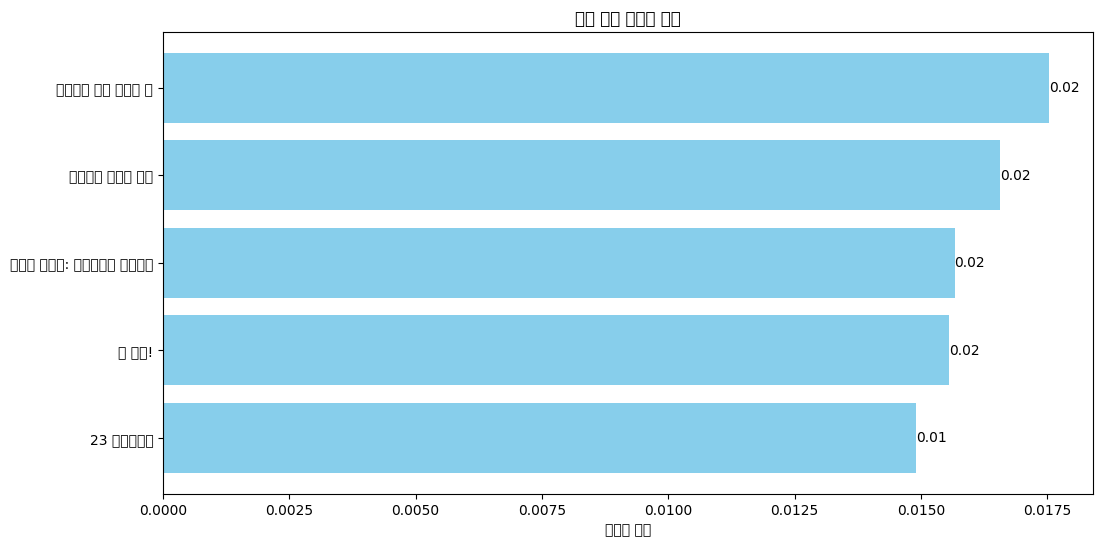

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt

# 파일 불러오기
file_path = 'movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# column 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 텍스트 데이터 인코딩 및 패딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Processed_Text'])
sequences = tokenizer.texts_to_sequences(data['Processed_Text'])
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['movie_name'])

# 모델 구축
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2)

def get_recommendations_dl(movie_title=None, genre=None, country=None, year=None):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    if movie_title:
        if movie_title not in data['movie_name'].values:
            return "영화 제목이 데이터베이스에 없습니다."

        # 영화 제목에 해당하는 인덱스 가져오기
        idx = data[data['movie_name'] == movie_title].index[0]
        movie_sequence = pad_sequences(tokenizer.texts_to_sequences([data.loc[idx, 'Processed_Text']]), maxlen=max_sequence_length)
        predictions = model.predict(movie_sequence)[0]

        sim_scores = []
        for i in range(len(predictions)):
            sim_scores.append((i, predictions[i]))

        # 유사도 순으로 정렬
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # 상위 5개 추천
        sim_scores = sim_scores[:5]
        movie_indices = [i[0] for i in sim_scores]
        recommendations = data.iloc[movie_indices]

        # 시각화를 위한 유사도 점수 포함
        similarity_scores = [i[1] for i in sim_scores]
        return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = data.head(5)
        similarity_scores = [1] * len(recommendations)  # 필터링된 결과에서는 유사도 점수를 1로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
inputs = inputs + [None] * (4 - len(inputs))  # 입력된 값의 개수가 4개가 되도록 보충
movie_title, genre, country, year = inputs

recommended_movies, similarity_scores = get_recommendations_dl(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)

# 추천된 영화 목록과 유사도 점수를 시각화
def visualize_recommendations(recommended_movies, similarity_scores):
    # 추천된 영화 목록을 데이터프레임으로 변환
    df = pd.DataFrame(recommended_movies, columns=["영화 제목", "장르", "제작 국가", "제작 연도"])
    df["유사도 점수"] = similarity_scores

    # 바 차트 생성
    plt.figure(figsize=(12, 6))
    plt.barh(df["영화 제목"], df["유사도 점수"], color='skyblue')
    plt.xlabel('유사도 점수')
    plt.title('영화 추천 유사도 점수')
    plt.gca().invert_yaxis()  # 영화 제목이 위에서 아래로 표시되도록 순서 뒤집기
    for i, (title, score) in enumerate(zip(df["영화 제목"], df["유사도 점수"])):
        plt.text(score, i, f'{score:.2f}', va='center')
    plt.show()

visualize_recommendations(recommended_movies, similarity_scores)


In [ ]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# accuracy는 영화추천에 좋은 건아닌거같다 loss랑 optimizer도 다른 것들 사용해보자

In [ ]:
# model.compile(loss=root_mean_squared_error, optimizer=SGD(), metrics=[root_mean_squared_error])
# rmse로 하고 optimizer는 sgd를 써봄 일딴 실행 속도너무느리다 lstm을 줄여야할뜻

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt

# RMSE 정의
def root_mean_squared_error(y_true, y_pred):
    y_true = K.cast(y_true, y_pred.dtype)  # y_true를 y_pred와 같은 데이터 유형으로 변환
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# 파일 불러오기
file_path = '/content/drive/MyDrive/movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# 컬럼 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 텍스트 데이터 인코딩 및 패딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Processed_Text'])
sequences = tokenizer.texts_to_sequences(data['Processed_Text'])
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['movie_name'])

# 모델 구축
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=512, input_length=max_sequence_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# loss와 metrics에 RMSE 정의
model.compile(loss=root_mean_squared_error, optimizer=SGD(), metrics=[root_mean_squared_error])

# 모델 학습
model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2)

def get_recommendations_dl(movie_title=None, genre=None, country=None, year=None):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    if movie_title:
        if movie_title not in data['movie_name'].values:
            return "영화 제목이 데이터베이스에 없습니다."

        # 영화 제목에 해당하는 인덱스 가져오기
        idx = data[data['movie_name'] == movie_title].index[0]
        movie_sequence = pad_sequences(tokenizer.texts_to_sequences([data.loc[idx, 'Processed_Text']]), maxlen=max_sequence_length)
        predictions = model.predict(movie_sequence)[0]

        sim_scores = []
        for i in range(len(predictions)):
            sim_scores.append((i, predictions[i]))

        # 유사도 순으로 정렬
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # 상위 5개 추천
        sim_scores = sim_scores[:5]
        movie_indices = [i[0] for i in sim_scores]
        recommendations = data.iloc[movie_indices]

        # 시각화를 위한 유사도 점수 포함
        similarity_scores = [i[1] for i in sim_scores]
        return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = data.head(5)
        similarity_scores = [1] * len(recommendations)  # 필터링된 결과에서는 유사도 점수를 1로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
inputs = inputs + [None] * (4 - len(inputs))  # 입력된 값의 개수가 4개가 되도록 보충
movie_title, genre, country, year = inputs

recommended_movies, similarity_scores = get_recommendations_dl(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)

# # 추천된 영화 목록과 유사도 점수를 시각화
# def visualize_recommendations(recommended_movies, similarity_scores):
#     # 추천된 영화 목록을 데이터프레임으로 변환
#     df = pd.DataFrame(recommended_movies, columns=["영화 제목", "장르", "제작 국가", "제작 연도"])
#     df["유사도 점수"] = similarity_scores

#     # 바 차트 생성
#     plt.figure(figsize=(12, 6))
#     plt.barh(df["영화 제목"], df["유사도 점수"], color='skyblue')
#     plt.xlabel('유사도 점수')
#     plt.title('영화 추천 유사도 점수')
#     plt.gca().invert_yaxis()  # 영화 제목이 위에서 아래로 표시되도록 순서 뒤집기
#     for i, (title, score) in enumerate(zip(df["영화 제목"], df["유사도 점수"])):
#         plt.text(score, i, f'{score:.2f}', va='center')
#     plt.show()

# visualize_recommendations(recommended_movies, similarity_scores)


Epoch 1/30
83/83 [==============================] - 82s 805ms/step - loss: 1881.7218 - root_mean_squared_error: 1881.9712 - val_loss: 1948.1306 - val_root_mean_squared_error: 1954.1888
Epoch 2/30
83/83 [==============================] - 62s 752ms/step - loss: 1883.4418 - root_mean_squared_error: 1883.9274 - val_loss: 1948.1306 - val_root_mean_squared_error: 1954.1888
Epoch 3/30
83/83 [==============================] - 62s 746ms/step - loss: 1883.1387 - root_mean_squared_error: 1882.9833 - val_loss: 1948.1306 - val_root_mean_squared_error: 1954.1888
Epoch 4/30
52/83 [=================>............] - ETA: 25s - loss: 1891.3718 - root_mean_squared_error: 1891.3718

In [ ]:
#일딴 시각화 잠시 삭제
#영화 실험조건 잠시 변경(제목만)

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from konlpy.tag import Okt

# RMSE 정의
def root_mean_squared_error(y_true, y_pred):
    y_true = K.cast(y_true, y_pred.dtype)  # y_true를 y_pred와 같은 데이터 유형으로 변환
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# 파일 불러오기
file_path = '/content/drive/MyDrive/movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# 컬럼 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 텍스트 데이터 인코딩 및 패딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Processed_Text'])
sequences = tokenizer.texts_to_sequences(data['Processed_Text'])
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['movie_name'])

# 모델 구축
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256, input_length=max_sequence_length))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# loss와 metrics에 RMSE 정의
model.compile(loss=root_mean_squared_error, optimizer=Adam(learning_rate=0.001), metrics=[root_mean_squared_error])

# Early Stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

def get_recommendations_dl(movie_title=None, genre=None, country=None, year=None):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    if movie_title:
        if movie_title not in data['movie_name'].values:
            return "영화 제목이 데이터베이스에 없습니다."

        # 영화 제목에 해당하는 인덱스 가져오기
        idx = data[data['movie_name'] == movie_title].index[0]
        movie_sequence = pad_sequences(tokenizer.texts_to_sequences([data.loc[idx, 'Processed_Text']]), maxlen=max_sequence_length)
        predictions = model.predict(movie_sequence)[0]

        sim_scores = []
        for i in range(len(predictions)):
            sim_scores.append((i, predictions[i]))

        # 유사도 순으로 정렬
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # 상위 5개 추천
        sim_scores = sim_scores[:5]
        movie_indices = [i[0] for i in sim_scores]
        recommendations = data.iloc[movie_indices]

        # 시각화를 위한 유사도 점수 포함
        similarity_scores = [i[1] for i in sim_scores]
        return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = data.head(5)
        similarity_scores = [1] * len(recommendations)  # 필터링된 결과에서는 유사도 점수를 1로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
inputs = inputs + [None] * (4 - len(inputs))  # 입력된 값의 개수가 4개가 되도록 보충
movie_title, genre, country, year = inputs

recommended_movies, similarity_scores = get_recommendations_dl(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)


Epoch 1/100
83/83 [==============================] - 20s 111ms/step - loss: 1882.6100 - root_mean_squared_error: 1881.8296 - val_loss: 1948.2717 - val_root_mean_squared_error: 1954.1888
Epoch 2/100
83/83 [==============================] - 4s 50ms/step - loss: 1881.8342 - root_mean_squared_error: 1882.2976 - val_loss: 1948.1725 - val_root_mean_squared_error: 1954.1888
Epoch 3/100
83/83 [==============================] - 3s 36ms/step - loss: 1884.0232 - root_mean_squared_error: 1883.7572 - val_loss: 1948.1410 - val_root_mean_squared_error: 1954.1888
Epoch 4/100
83/83 [==============================] - 2s 25ms/step - loss: 1884.0889 - root_mean_squared_error: 1884.2937 - val_loss: 1948.1327 - val_root_mean_squared_error: 1954.1888
Epoch 5/100
83/83 [==============================] - 3s 32ms/step - loss: 1882.8727 - root_mean_squared_error: 1882.8118 - val_loss: 1948.1310 - val_root_mean_squared_error: 1954.1888
Epoch 6/100
83/83 [==============================] - 3s 35ms/step - loss: 1883

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from konlpy.tag import Okt

# 파일 불러오기
file_path = '/content/drive/MyDrive/movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# 컬럼 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 텍스트 데이터 인코딩 및 패딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Processed_Text'])
sequences = tokenizer.texts_to_sequences(data['Processed_Text'])
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['movie_name'])

# 모델 구축
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=512, input_length=max_sequence_length))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# loss와 metrics에 mean_squared_error 정의
model.compile(loss='mean_squared_error', optimizer=RMSprop(), metrics=['mean_squared_error'])

# Early Stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

def get_recommendations_dl(movie_title=None, genre=None, country=None, year=None):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    if movie_title:
        if movie_title not in data['movie_name'].values:
            return "영화 제목이 데이터베이스에 없습니다."

        # 영화 제목에 해당하는 인덱스 가져오기
        idx = data[data['movie_name'] == movie_title].index[0]
        movie_sequence = pad_sequences(tokenizer.texts_to_sequences([data.loc[idx, 'Processed_Text']]), maxlen=max_sequence_length)
        predictions = model.predict(movie_sequence)[0]

        sim_scores = []
        for i in range(len(predictions)):
            sim_scores.append((i, predictions[i]))

        # 유사도 순으로 정렬
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # 상위 5개 추천
        sim_scores = sim_scores[:5]
        movie_indices = [i[0] for i in sim_scores]
        recommendations = data.iloc[movie_indices]

        # 시각화를 위한 유사도 점수 포함
        similarity_scores = [i[1] for i in sim_scores]
        return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = data.head(5)
        similarity_scores = [1] * len(recommendations)  # 필터링된 결과에서는 유사도 점수를 1로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
inputs = inputs + [None] * (4 - len(inputs))  # 입력된 값의 개수가 4개가 되도록 보충
movie_title, genre, country, year = inputs

recommended_movies, similarity_scores = get_recommendations_dl(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)


Epoch 1/100
83/83 [==============================] - 26s 139ms/step - loss: 3570282.5000 - mean_squared_error: 3570282.5000 - val_loss: 3823496.7500 - val_mean_squared_error: 3823496.7500
Epoch 2/100
83/83 [==============================] - 3s 38ms/step - loss: 3570282.0000 - mean_squared_error: 3570282.0000 - val_loss: 3823496.7500 - val_mean_squared_error: 3823496.7500
Epoch 3/100
83/83 [==============================] - 3s 35ms/step - loss: 3570281.7500 - mean_squared_error: 3570281.7500 - val_loss: 3823496.7500 - val_mean_squared_error: 3823496.7500
Epoch 4/100
83/83 [==============================] - 2s 29ms/step - loss: 3570282.0000 - mean_squared_error: 3570282.0000 - val_loss: 3823496.7500 - val_mean_squared_error: 3823496.7500
Epoch 5/100
83/83 [==============================] - 4s 50ms/step - loss: 3570281.7500 - mean_squared_error: 3570281.7500 - val_loss: 3823496.7500 - val_mean_squared_error: 3823496.7500
Epoch 6/100
83/83 [==============================] - 3s 31ms/step - 

1/1 [==============================] - 4s 4s/step
추천된 영화들:
 [['익스펜더블 에셋', '액션,전쟁', '미국', 2016.0], ['극장판 숲의 요정 페어리루 ~크리스마스의 기적: 마법의 날개~', '애니메이션', '일본', 2017.0], ['주피터 어센딩', 'SF,액션,어드벤처', '미국', 2014.0], ['그란 투리스모', '액션', '미국', 2023.0], ['오늘', '드라마', '한국', 2011.0]]


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from konlpy.tag import Okt

# 파일 불러오기
file_path = '/content/drive/MyDrive/movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# 컬럼 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 텍스트 데이터 인코딩 및 패딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Processed_Text'])
sequences = tokenizer.texts_to_sequences(data['Processed_Text'])
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['movie_name'])

# 모델 구축
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Early Stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

def get_recommendations_dl(movie_title=None, genre=None, country=None, year=None):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    if movie_title:
        if movie_title not in data['movie_name'].values:
            return "영화 제목이 데이터베이스에 없습니다."

        # 영화 제목에 해당하는 인덱스 가져오기
        idx = data[data['movie_name'] == movie_title].index[0]
        movie_sequence = pad_sequences(tokenizer.texts_to_sequences([data.loc[idx, 'Processed_Text']]), maxlen=max_sequence_length)
        predictions = model.predict(movie_sequence)[0]

        sim_scores = []
        for i in range(len(predictions)):
            sim_scores.append((i, predictions[i]))

        # 유사도 순으로 정렬
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # 상위 5개 추천
        sim_scores = sim_scores[:5]
        movie_indices = [i[0] for i in sim_scores]
        recommendations = data.iloc[movie_indices]

        # 시각화를 위한 유사도 점수 포함
        similarity_scores = [i[1] for i in sim_scores]
        return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = data.head(5)
        similarity_scores = [1] * len(recommendations)  # 필터링된 결과에서는 유사도 점수를 1로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
inputs = inputs + [None] * (4 - len(inputs))  # 입력된 값의 개수가 4개가 되도록 보충
movie_title, genre, country, year = inputs

recommended_movies, similarity_scores = get_recommendations_dl(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)


Epoch 1/30


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3294) are incompatible


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# 파일 불러오기
file_path = '/content/drive/MyDrive/movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# 컬럼 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 텍스트 데이터 인코딩 및 패딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Processed_Text'])
sequences = tokenizer.texts_to_sequences(data['Processed_Text'])
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['movie_name'])

# 레이블을 원-핫 인코딩으로 변환
y = to_categorical(y)

# 모델 구축
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model.add(Dropout(0.2))  # Dropout 비율 낮춤
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.2))  # Dropout 비율 낮춤
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))  # Dropout 비율 낮춤
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Early Stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 예측 함수를 tf.function으로 정의
@tf.function
def predict(model, sequence):
    return model(sequence, training=False)

def get_recommendations_dl(movie_title=None, genre=None, country=None, year=None):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    if movie_title:
        if movie_title not in data['movie_name'].values:
            return "영화 제목이 데이터베이스에 없습니다."

        # 영화 제목에 해당하는 인덱스 가져오기
        idx = data[data['movie_name'] == movie_title].index[0]
        movie_sequence = pad_sequences(tokenizer.texts_to_sequences([data.loc[idx, 'Processed_Text']]), maxlen=max_sequence_length)
        movie_sequence = tf.convert_to_tensor(movie_sequence)  # 텐서로 변환
        predictions = predict(model, movie_sequence)[0].numpy()

        sim_scores = []
        for i in range(len(predictions)):
            sim_scores.append((i, predictions[i]))

        # 유사도 순으로 정렬
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # 상위 5개 추천
        sim_scores = sim_scores[:5]
        movie_indices = [i[0] for i in sim_scores]
        recommendations = data.iloc[movie_indices]

        # 시각화를 위한 유사도 점수 포함
        similarity_scores = [i[1] for i in sim_scores]
        return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = data.head(5)
        similarity_scores = [1] * len(recommendations)  # 필터링된 결과에서는 유사도 점수를 1로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
inputs = inputs + [None] * (4 - len(inputs))  # 입력된 값의 개수가 4개가 되도록 보충
movie_title, genre, country, year = inputs

recommended_movies, similarity_scores = get_recommendations_dl(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)


Epoch 1/30
83/83 [==============================] - 18s 103ms/step - loss: 8.3836 - accuracy: 0.0000e+00 - val_loss: 8.2833 - val_accuracy: 0.0000e+00
Epoch 2/30
83/83 [==============================] - 5s 59ms/step - loss: 8.1744 - accuracy: 0.0000e+00 - val_loss: 8.2446 - val_accuracy: 0.0000e+00
Epoch 3/30
83/83 [==============================] - 2s 29ms/step - loss: 8.0957 - accuracy: 0.0000e+00 - val_loss: 8.3112 - val_accuracy: 0.0000e+00
Epoch 4/30
83/83 [==============================] - 2s 22ms/step - loss: 7.9682 - accuracy: 0.0000e+00 - val_loss: 8.4868 - val_accuracy: 0.0000e+00
Epoch 5/30
83/83 [==============================] - 2s 27ms/step - loss: 7.8313 - accuracy: 3.7722e-04 - val_loss: 8.6646 - val_accuracy: 0.0000e+00
Epoch 6/30
83/83 [==============================] - 1s 16ms/step - loss: 7.7593 - accuracy: 0.0011 - val_loss: 8.9100 - val_accuracy: 0.0000e+00
Epoch 7/30
83/83 [==============================] - 1s 17ms/step - loss: 7.7311 - accuracy: 3.7722e-04 - val